# 1. Preparation
## 1.1. Install libraries

In [1]:
# !pip install -r requirements.txt

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from scipy.stats import t, norm

## 1.2. Load data

In [3]:
df = pd.read_csv('./data/Sleep_health_and_lifestyle_dataset.csv')

In [4]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### Dataset Overview:
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Key Features of the Dataset:
- Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
- Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
- Cardiovascular Health: Examine blood pressure and heart rate measurements.
- Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

### Dataset Columns:
- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

### Details about Sleep Disorder Column:
- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

## 1.3. Load 2 columns for statistical calculation 
Take input for 2 columns for statistical calculation

In [5]:
while True:
    try:
        col1 = input("Enter the 1st column for statistical calculation: ")
        if col1 in df.columns:
            break
        else:
            raise Exception("Column not found in the dataset")
    except Exception as e:
        print(e)

while True:
    try:
        col2 = input("Enter the 2nd column for statistical calculation: ")
        if col2 in df.columns:
            break
        else:
            raise Exception("Column not found in the dataset")
    except Exception as e:
        print(e)

In this specific analysis, we will be focusing on the statistical calculation of the columns 'Sleep Duration (hours)' and  'Physical Activity Level (minutes/day)' from the dataset.

In [6]:
stat_df = df[[col1, col2]]

A snapshot of the selected columns from the dataset is displayed below:

In [7]:
stat_df.head()

,Physical Activity Level,Sleep Duration
0,42,6.1
1,60,6.2
2,60,6.2
3,30,5.9
4,30,5.9


# 2. Descriptive Statistics

## 2.1. Calculate Descriptive Statistics

In [8]:
# Calculate the variance
variance_df = pd.DataFrame(stat_df.var()).transpose()
variance_df.index = ['var']

# Calculate IQR
Q1 = stat_df.quantile(0.25)
Q3 = stat_df.quantile(0.75)
IQR = Q3 - Q1

IQR_df = pd.DataFrame(IQR).transpose()
IQR_df.index = ['IQR']

# Calculate Range
Range = stat_df.max() - stat_df.min()
Range_df = pd.DataFrame(Range).transpose()
Range_df.index = ['Range']

descriptive_stats_df = pd.concat([stat_df.describe(), variance_df, IQR_df, Range_df])

descriptive_stats_df


,Physical Activity Level,Sleep Duration
count,374.000000,374.000000
mean,59.171123,7.132086
std,20.830804,0.795657
min,30.000000,5.800000
25%,45.000000,6.400000
50%,60.000000,7.200000
75%,75.000000,7.800000
max,90.000000,8.500000
var,433.922381,0.633070
IQR,30.000000,1.400000


The 'stat_df.describe()' result above provides a summary of the statistical measures for the selected columns. It includes the count, mean, variance, standard deviation, minimum, maximum, quartile values and IQR for both 'Sleep Duration (hours)' and 'Physical Activity Level (minutes/day)'.

Then we extract the relevant statistics from the DataFrame for further analysis.

In [9]:
def extract_stats_from_df(column_name, input_df):
    extracted_stats = input_df[column_name]
    
    extracted_stats = {
        "count": extracted_stats['count'],
        "mean": extracted_stats['mean'],
        "std": extracted_stats['std'],
        "min": extracted_stats['min'],
        "25%": extracted_stats['25%'],
        "50%": extracted_stats['50%'],
        "75%": extracted_stats['75%'],
        "max": extracted_stats['max'],
        "var": extracted_stats['var'],
        "IQR": extracted_stats['IQR'],
        "range": extracted_stats['Range']
    }
    return extracted_stats

col1_dict = extract_stats_from_df(col1, descriptive_stats_df)
col2_dict = extract_stats_from_df(col2, descriptive_stats_df)

col1_dict, col2_dict


({'count': 374.0,
  'mean': 59.17112299465241,
  'std': 20.830803658071673,
  'min': 30.0,
  '25%': 45.0,
  '50%': 60.0,
  '75%': 75.0,
  'max': 90.0,
  'var': 433.92238104113204,
  'IQR': 30.0,
  'range': 60.0},
 {'count': 374.0,
  'mean': 7.132085561497325,
  'std': 0.7956567308898188,
  'min': 5.8,
  '25%': 6.4,
  '50%': 7.2,
  '75%': 7.8,
  'max': 8.5,
  'var': 0.6330696334102736,
  'IQR': 1.3999999999999995,
  'range': 2.7})

## 2.2. Plot diagrams
### 2.2.1 Histogram and Box Plot

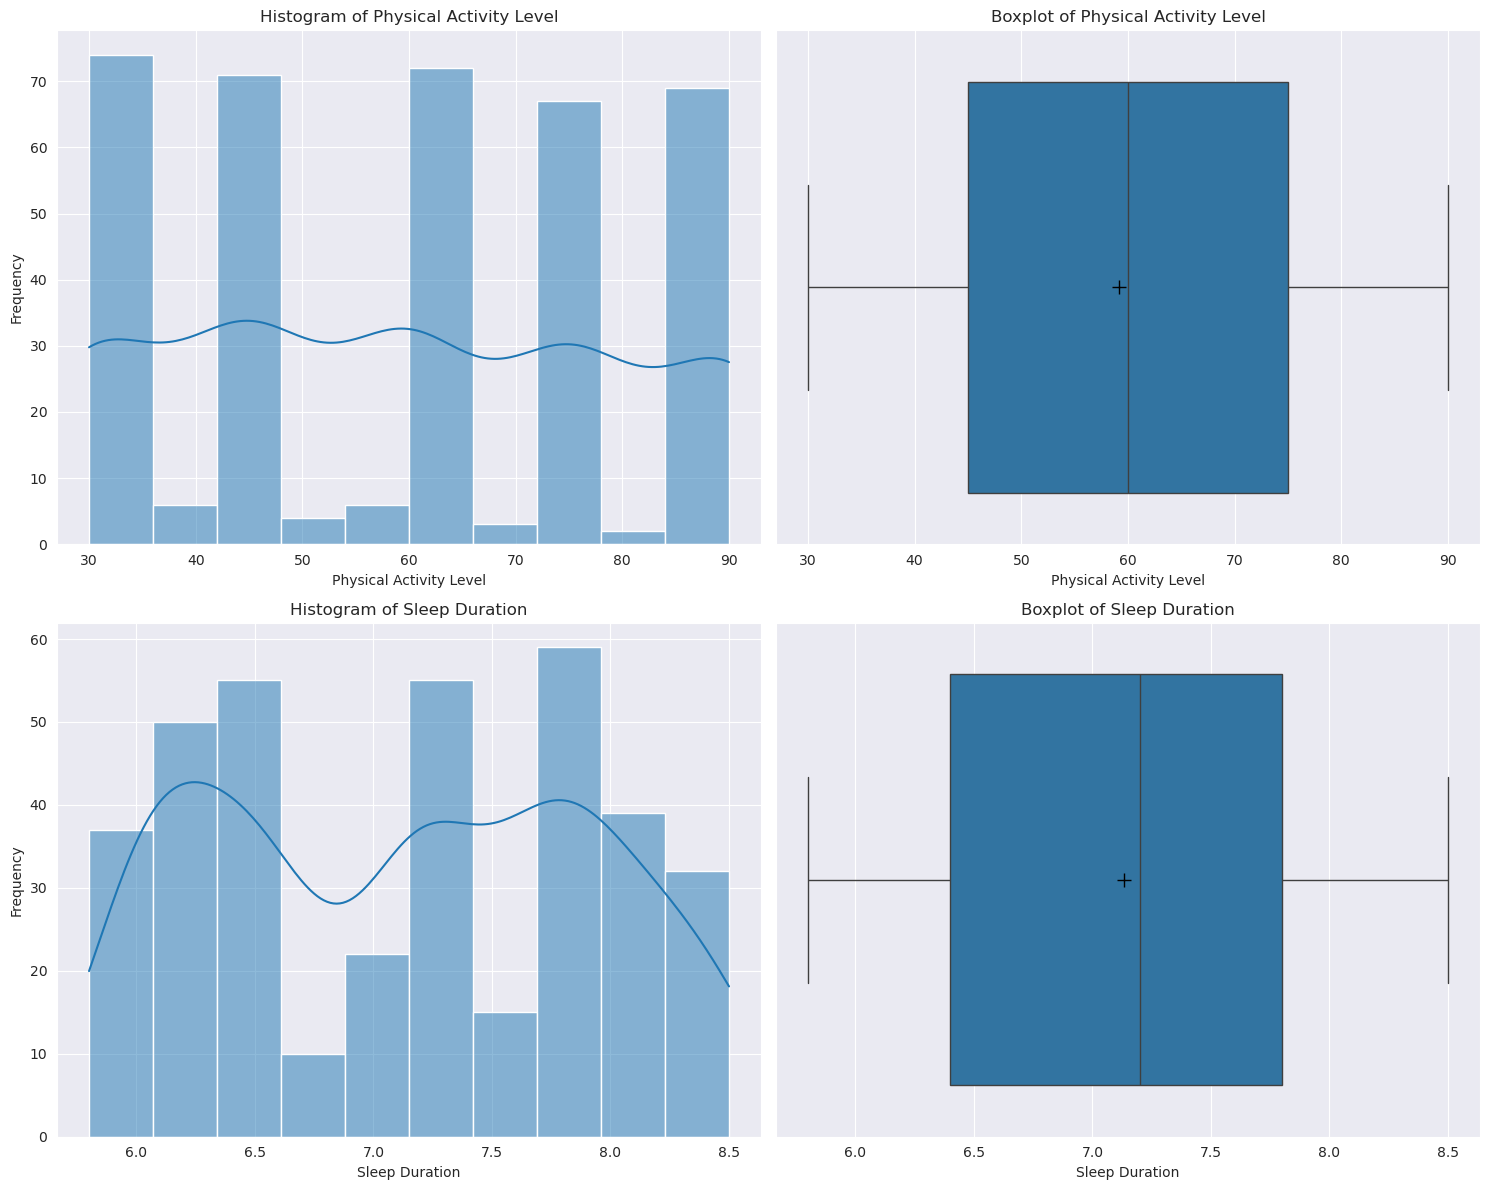

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Histogram and Box Plot for Physical Activity Level
sns.histplot(stat_df[col1], ax=axs[0, 0], kde=True)
axs[0, 0].set_title(f'Histogram of {col1}')
axs[0, 0].set_xlabel(col1)
axs[0, 0].set_ylabel('Frequency')

sns.boxplot(x=stat_df[col1], ax=axs[0, 1], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
axs[0, 1].set_title(f'Boxplot of {col1}')
axs[0, 1].set_xlabel(col1)

# Histogram and Box Plot for Sleep Duration
sns.histplot(stat_df[col2], ax=axs[1, 0], kde=True)
axs[1, 0].set_title(f'Histogram of {col2}')
axs[1, 0].set_xlabel(col2)
axs[1, 0].set_ylabel('Frequency')

sns.boxplot(x=stat_df[col2], ax=axs[1, 1], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})
axs[1, 1].set_title(f'Boxplot of {col2}')
axs[1, 1].set_xlabel(col2)

plt.tight_layout()
plt.show()

#### Skewness Calculation

Determine the skewness by median and mean

In [11]:
def determine_skewness_by_median_mean(data, column):
    median_skew = data[column].median() - data[column].mean()
    
    if median_skew == 0:
        skew_type = 'symmetric'
    elif median_skew > 0:
        skew_type = 'right-skewed'
    else:
        skew_type = 'left-skewed'
    
    return skew_type

In [12]:
col1_skew_type = determine_skewness_by_median_mean(stat_df, col1)
col2_skew_type = determine_skewness_by_median_mean(stat_df, col2)

print(f'{col1} is {col1_skew_type}')
print(f'{col2} is {col2_skew_type}')

Physical Activity Level is right-skewed
Sleep Duration is right-skewed


Determine the skewness by `scipy.stats` and threshold of 0.5:
- If the skewness is less than -0.5, the distribution is considered left-skewed.
- If the skewness is greater than 0.5, the distribution is considered right-skewed.
- If the skewness is between -0.5 and 0.5, the distribution is considered symmetric.

In [13]:
def determine_skewness(data, column, threshold=0.5):
    skewness = stats.skew(data[column])
    
    if abs(skewness) < threshold:
        skew_type = 'symmetric'
    elif skewness > 0:
        skew_type = 'right-skewed'
    else:
        skew_type = 'left-skewed'
    
    return skew_type

In [14]:
col1_skew_type = determine_skewness(stat_df, col1)
col2_skew_type = determine_skewness(stat_df, col2)

print(f'{col1} is {col1_skew_type}')
print(f'{col2} is {col2_skew_type}')

Physical Activity Level is symmetric
Sleep Duration is symmetric


### 2.2.2. Plot scatter plot

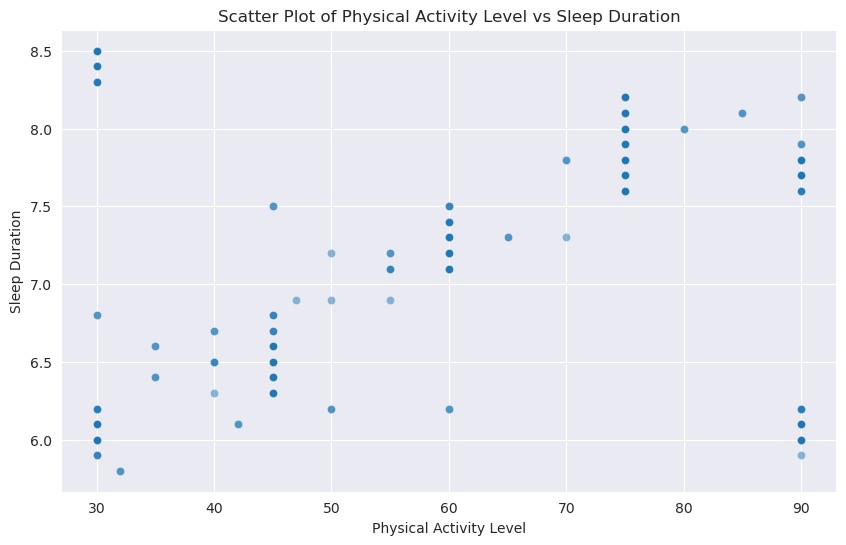

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stat_df[col1], y=stat_df[col2], alpha=0.5)

# Adding titles and labels
plt.title(f'Scatter Plot of {col1} vs {col2}')
plt.xlabel(col1)
plt.ylabel(col2)

# Show plot
plt.show()

In [16]:
duplicates = stat_df.duplicated(subset=[col1, col2])
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 318


Since there are no duplicate rows in the dataset, we visualize the scatter plot with jitter to better visualize the distribution of data points.

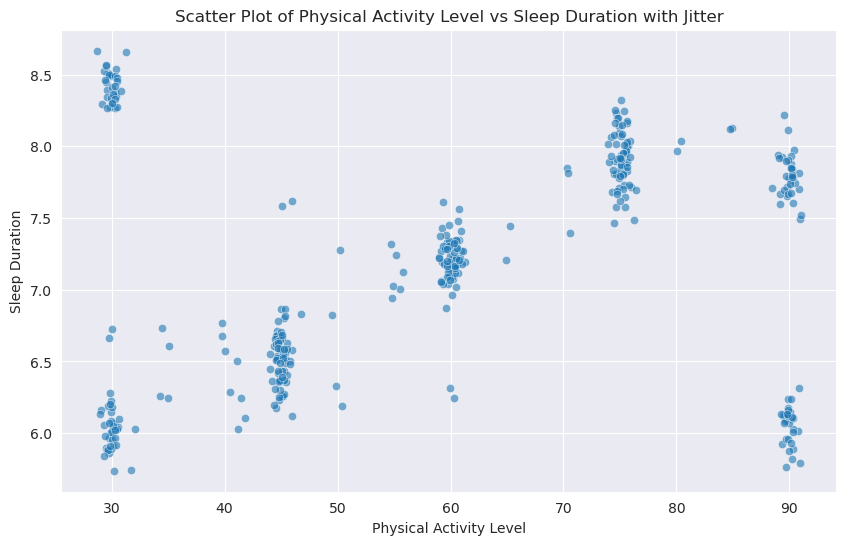

In [17]:
# Create jitter plot with random noise for better visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stat_df[col1] + np.random.normal(0, 0.5, len(stat_df)), 
                y=stat_df[col2] + np.random.normal(0, 0.1, len(stat_df)), 
                alpha=0.6)

# Adding titles and labels
plt.title(f'Scatter Plot of {col1} vs {col2} with Jitter')
plt.xlabel(col1)
plt.ylabel(col2)

# Show plot
plt.show()

# 3. Random sample & point estimation

Setup functions

In [18]:
def randomly_sample_data(data: pd.DataFrame, column: str, sample_size_n: int):
    """
    Randomly sample n values from a column in the dataset.

    Parameters:
    data (pd.DataFrame): The dataset containing the column.
    column (str): The name of the column to sample.
    n (int): The number of samples to draw (n > 30).

    Returns:
    pd.Series: A sample of n values from the specified column.
    """
    if not sample_size_n > 30:
        raise ValueError("Sample size should be greater than 30")
    return data[column].sample(n=sample_size_n)

In [19]:
def point_estimation(sample):
    """
    Calculate point estimates (mean and standard deviation) for a sample.

    Parameters:
    sample (pd.Series): The sample data.

    Returns:
    dict: A dictionary with the sample mean and sample standard deviation.
    """
    sample_mean = sample.mean()
    sample_std = sample.std()
    return {"mean": sample_mean, "std": sample_std}

## 3.1. Randomly sample data
Randomly sample data from each column based on user input and calculate point estimates (sample mean and standard deviation) for each sample.

In [20]:
while True:
    try:
        n = int(input("Enter the sample size (n > 30): "))  # Here I use 40
        
        sample_col1 = randomly_sample_data(stat_df, col1, n)
        sample_col2 = randomly_sample_data(stat_df, col2, n)
        
        break
    except ValueError as e:
        print(e)

# Calculate point estimates for each sample
col1_point_estimates = point_estimation(sample_col1)
col2_point_estimates = point_estimation(sample_col2)

In [21]:
sample_col1.head()

39     75
98     60
339    75
154    60
359    75
Name: Physical Activity Level, dtype: int64

In [22]:
print(f'Point Estimates for {col1}:\n{col1_point_estimates}')

# Compare to the population values
print(f'Population Mean for {col1}: {col1_dict["mean"]}')
print(f'Population Standard Deviation for {col1}: {col1_dict["std"]}')

Point Estimates for Physical Activity Level:
{'mean': 56.125, 'std': 22.74404684014405}
Population Mean for Physical Activity Level: 59.17112299465241
Population Standard Deviation for Physical Activity Level: 20.830803658071673


In [23]:
sample_col2.head()

56     7.7
18     6.5
13     6.0
312    8.4
114    7.2
Name: Sleep Duration, dtype: float64

In [24]:
print(f'Point Estimates for {col2}:\n{col2_point_estimates}')

# Compare to the population values
print(f'Population Mean for {col2}: {col2_dict["mean"]}')
print(f'Population Standard Deviation for {col2}: {col2_dict["std"]}')

Point Estimates for Sleep Duration:
{'mean': 7.010000000000001, 'std': 0.8816650913659525}
Population Mean for Sleep Duration: 7.132085561497325
Population Standard Deviation for Sleep Duration: 0.7956567308898188


### 3.1.1. Cumulative distribution calculation on the sample

Take input range from user and calculate the cumulative distribution for each column on the sample.

Setup probability calculation function using the z-score formula:

In [25]:
def calculate_probability(sample_data_n: pd.Series, user_range: tuple):
    mean = sample_data_n.mean()
    std = sample_data_n.std()
    z1 = (user_range[0] - mean) / (std / np.sqrt(n)) if user_range[0] is not None else -np.inf
    z2 = (user_range[1] - mean) / (std / np.sqrt(n)) if user_range[1] is not None else np.inf
    probability = norm.cdf(z2) - norm.cdf(z1)
    return probability

def parse_range(user_input):
    bounds = user_input.split(',')
    lower = float(bounds[0]) if bounds[0].strip() else None
    upper = float(bounds[1]) if len(bounds) > 1 and bounds[1].strip() else None
    return lower, upper

Take input range from user and calculate the cumulative distribution for each column on the sample.

If the range is $x > 40$ or $x < 40$, the user can input as ",40" or "40," respectively.

In [34]:
while True:
    try:
        user_input_col1 = input(f"Range for {col1}: {sample_col1.min()} to {sample_col1.max()}\n" + f"Enter the range for {col1} (e.g., ,50 or 10, or 10,50): ")
        user_range_col1 = parse_range(user_input_col1)
        print(f'User Range for {col1}', user_range_col1)
        
        user_input_col2 = input(f"Range for {col2}: {sample_col2.min()} to {sample_col2.max()}\n" + f"Enter the range for {col2} (e.g., ,7.5 or 5.5, or 5.5,7.5): ")
        user_range_col2 = parse_range(user_input_col2)
        print(f'User Range for {col2}', user_range_col2)

        if user_range_col1[0] is not None and (user_range_col1[0] < sample_col1.min() or user_range_col1[0] > sample_col1.max()):
            raise ValueError(f"Lower bound for {col1} is out of bounds.")
        if user_range_col1[1] is not None and (user_range_col1[1] < sample_col1.min() or user_range_col1[1] > sample_col1.max()):
            raise ValueError(f"Upper bound for {col1} is out of bounds.")
        
        if user_range_col2[0] is not None and (user_range_col2[0] < sample_col2.min() or user_range_col2[0] > sample_col2.max()):
            raise ValueError(f"Lower bound for {col2} is out of bounds.")
        if user_range_col2[1] is not None and (user_range_col2[1] < sample_col2.min() or user_range_col2[1] > sample_col2.max()):
            raise ValueError(f"Upper bound for {col2} is out of bounds.")

        break
    except ValueError as e:
        print(e)

User Range for Physical Activity Level (50.0, 80.0)
User Range for Sleep Duration (6.0, 7.0)


In [35]:
prob_col1 = calculate_probability(sample_col1, user_range_col1)
prob_col2 = calculate_probability(sample_col2, user_range_col2)

In [36]:
print(f"Probability for {col1} within range {user_range_col1}: {100*prob_col1:.4f}%")
print(f"Probability for {col2} within range {user_range_col2}: {100*prob_col2:.4f}%")

Probability for Physical Activity Level within range (50.0, 80.0): 95.5736%
Probability for Sleep Duration within range (6.0, 7.0): 47.1407%


## 3.2 Sampling Distribution
Calculate the sampling distribution of the sample mean and sample standard deviation for each column for the given sample size for 1000 samples.

In [29]:
def sampling_distribution(data, column, sample_size_n, num_samples=1000):
    sample_means = []
    sample_stds = []
    for i in range(num_samples):
        sample = randomly_sample_data(data, column, sample_size_n)
        sample_means.append(sample.mean())
        sample_stds.append(sample.std())

    return pd.DataFrame({'Sample Mean': sample_means, 'Sample Std': sample_stds})

# Create sampling distributions for each column
sampling_dist_col1 = sampling_distribution(stat_df, col1, n)
sampling_dist_col2 = sampling_distribution(stat_df, col2, n)

In [30]:
sampling_dist_col1

,Sample Mean,Sample Std
0,54.625,21.908537
1,57.425,20.527514
2,59.050,19.714566
3,56.750,19.629583
4,64.625,17.628193
...,...,...
995,58.425,20.599835
996,56.375,20.127399
997,62.000,19.767884
998,62.250,18.395582


In [31]:
sampling_dist_col2

,Sample Mean,Sample Std
0,7.3100,0.806639
1,7.1125,0.908419
2,7.3050,0.724993
3,7.1600,0.846350
4,7.1475,0.814606
...,...,...
995,6.9850,0.740945
996,7.0700,0.793628
997,7.1225,0.858289
998,6.8925,0.731135


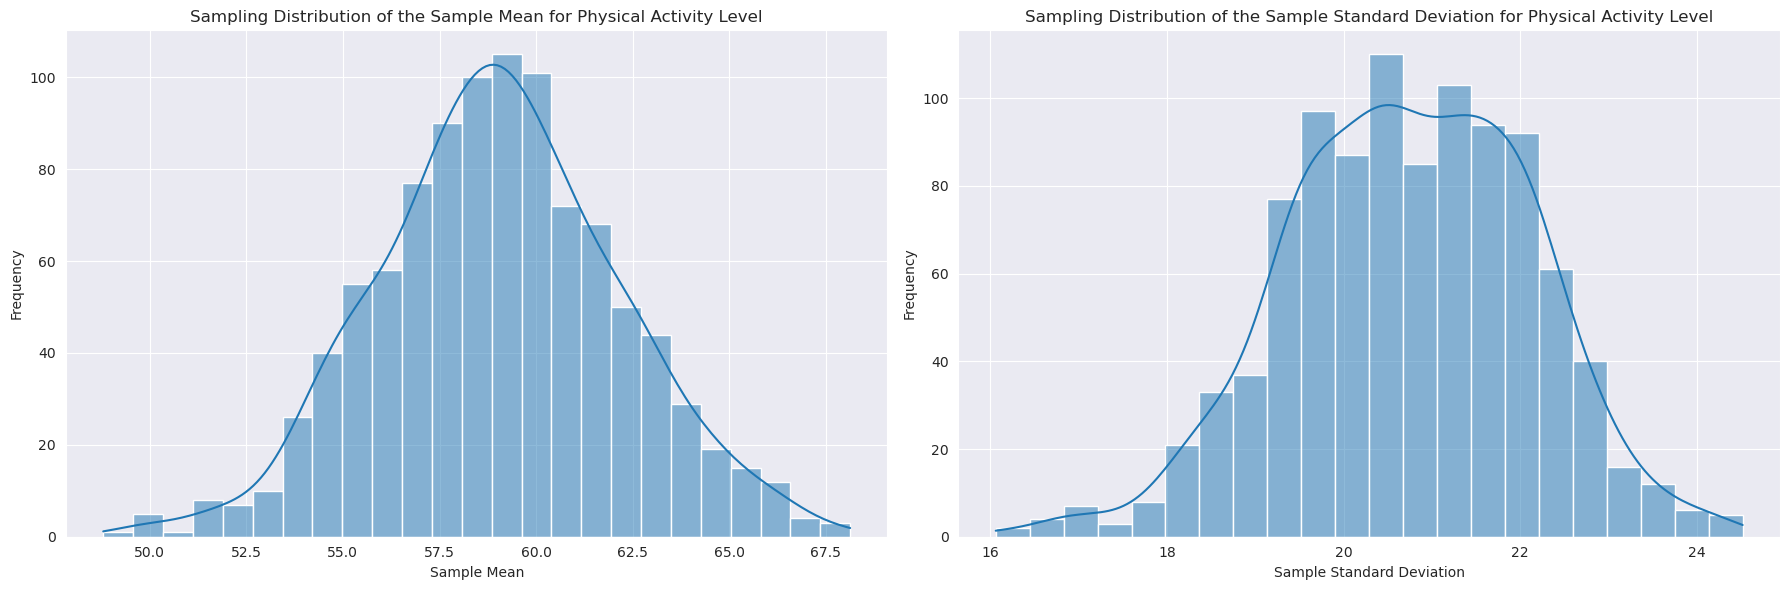

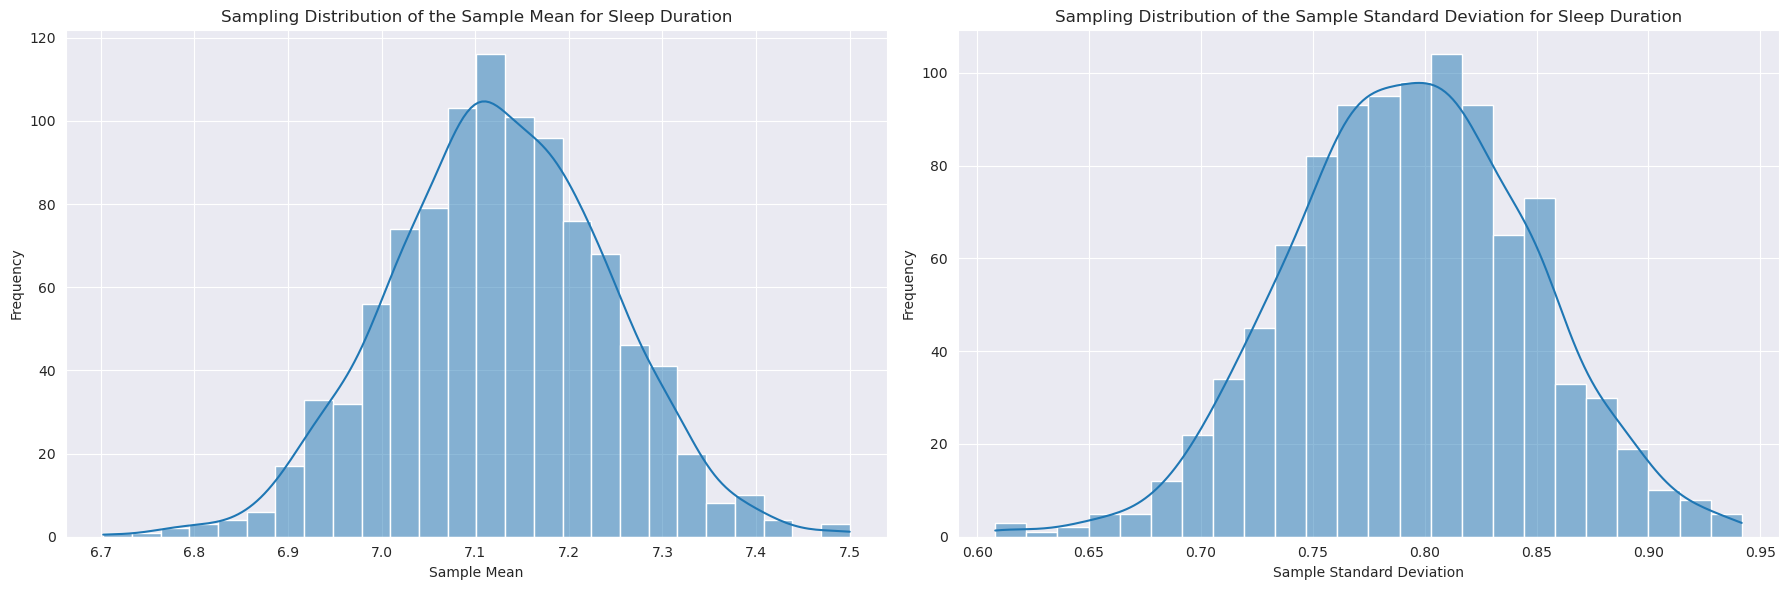

In [32]:
# Plot the sampling distributions for col1
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(sampling_dist_col1['Sample Mean'], kde=True, ax=axs[0])
axs[0].set_title(f'Sampling Distribution of the Sample Mean for {col1}')
axs[0].set_xlabel('Sample Mean')
axs[0].set_ylabel('Frequency')

sns.histplot(sampling_dist_col1['Sample Std'], kde=True, ax=axs[1])
axs[1].set_title(f'Sampling Distribution of the Sample Standard Deviation for {col1}')
axs[1].set_xlabel('Sample Standard Deviation')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot the sampling distributions for col2
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(sampling_dist_col2['Sample Mean'], kde=True, ax=axs[0])
axs[0].set_title(f'Sampling Distribution of the Sample Mean for {col2}')
axs[0].set_xlabel('Sample Mean')
axs[0].set_ylabel('Frequency')

sns.histplot(sampling_dist_col2['Sample Std'], kde=True, ax=axs[1])
axs[1].set_title(f'Sampling Distribution of the Sample Standard Deviation for {col2}')
axs[1].set_xlabel('Sample Standard Deviation')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

This result shows that the sampling distribution of the sample mean and sample standard deviation for both 'Sleep Duration (hours)' and 'Physical Activity Level (minutes/day)' are approximately normally distributed, which aligns with the Central Limit Theorem (CLT).

# 4. Statistical intervals

Sample data extraction based on user input

In [37]:
def extract_sample(data: pd.DataFrame, sample_size_n: int):
    if not (0 < sample_size_n <= len(data)):
        raise ValueError("Sample size must be greater than 0 and less than the size of the dataframe.")
    return data.sample(n=sample_size_n)

In [38]:
while True:
    try:
        sample_size = int(input(f"Enter the sample size (0 < sample size < {len(stat_df)}): "))
        sample_data = extract_sample(stat_df, sample_size)
        break
    except ValueError as e:
        print(e)

In [40]:
sample_data

,Physical Activity Level,Sleep Duration
49,75,7.7
331,30,8.4
266,65,7.3
183,90,7.8
180,90,7.8
...,...,...
102,60,7.2
264,65,7.3
99,60,7.1
233,45,6.3


## 4.1. Calculate the CI for both columns at different confidence levels
First lets set up the functions for z-distribution and t-distribution based CI calculation.

### z-distribution based CI calculation

In [52]:
def calculate_z_confidence_interval(input_sample_data: pd.Series, input_confidence_level: float):
    mean = input_sample_data.mean()
    std = input_sample_data.std()
    sample_size_n = len(input_sample_data)
    se = std / np.sqrt(sample_size_n)
    
    # Get the Z-score for the given confidence level
    z_score = norm.ppf(1 - (1 - input_confidence_level) / 2)
    
    # Calculate the margin of error
    moe = z_score * se
    
    # Calculate the two-sided confidence interval
    ci_lower = mean - moe
    ci_upper = mean + moe
    
    return ci_lower, ci_upper

def calculate_one_sided_z_confidence_interval(input_sample_data: pd.Series, input_confidence_level: float):
    mean = input_sample_data.mean()
    std = input_sample_data.std()
    sample_size_n = len(input_sample_data)
    se = std / np.sqrt(sample_size_n)
    
    # Get the Z-score for the given confidence level
    z_score = norm.ppf(input_confidence_level)
    
    # Calculate the margin of error
    moe = z_score * se
    
    # Calculate the one-sided confidence intervals
    ci_upper = mean + moe
    ci_lower = mean - moe
    
    return {"upper": (mean, ci_upper), "lower": (ci_lower, mean)}

### t-distribution based CI calculation

In [ ]:
def calculate_t_confidence_interval(input_sample_data: pd.Series, input_confidence_level: float):
    mean = input_sample_data.mean()
    std = input_sample_data.std()
    sample_size_n = len(input_sample_data)
    se = std / np.sqrt(sample_size_n)
    
    # Get the T-score for the given confidence level and degrees of freedom
    t_score = t.ppf(1 - (1 - input_confidence_level) / 2, df=sample_size_n - 1)
    
    # Calculate the margin of error
    moe = t_score * se
    
    # Calculate the two-sided confidence interval
    ci_lower = mean - moe
    ci_upper = mean + moe
    
    return ci_lower, ci_upper

def calculate_one_sided_t_confidence_interval(input_sample_data: pd.Series, input_confidence_level: float):
    mean = input_sample_data.mean()
    std = input_sample_data.std()
    sample_size_n = len(input_sample_data)
    se = std / np.sqrt(sample_size_n)
    
    # Get the T-score for the given confidence level and degrees of freedom
    t_score = t.ppf(input_confidence_level, df=sample_size_n - 1)
    
    # Calculate the margin of error
    moe = t_score * se
    
    # Calculate the one-sided confidence intervals
    ci_upper = mean + moe
    ci_lower = mean - moe
    
    return {"upper": (mean, ci_upper), "lower": (ci_lower, mean)}

### Results

In [53]:
confidence_levels = [0.90, 0.95, 0.99]

# Calculate confidence intervals for both columns
ci_results = {col: {"z": {"two_sided": {}, "one_sided": {}}, "t": {"two_sided": {}, "one_sided": {}}} for col in [col1, col2]}
for col in [col1, col2]:
    for confidence_level in confidence_levels:
        if sample_size >= 30:
            ci_results[col]["z"]["two_sided"][confidence_level] = calculate_z_confidence_interval(sample_data[col], confidence_level)
            ci_results[col]["z"]["one_sided"][confidence_level] = calculate_one_sided_z_confidence_interval(sample_data[col], confidence_level)
        ci_results[col]["t"]["two_sided"][confidence_level] = calculate_t_confidence_interval(sample_data[col], confidence_level)
        ci_results[col]["t"]["one_sided"][confidence_level] = calculate_one_sided_t_confidence_interval(sample_data[col], confidence_level)

{'Physical Activity Level': {'z': {'two_sided': {0.9: (58.55099121049996,
     63.37900878950005),
    0.95: (58.08853111045375, 63.841468889546256),
    0.99: (57.18467907834861, 64.7453209216514)},
   'one_sided': {0.9: {'upper': (60.965, 62.84582191189009),
     'lower': (59.084178088109915, 60.965)},
    0.95: {'upper': (60.965, 63.37900878950005),
     'lower': (58.55099121049996, 60.965)},
    0.99: {'upper': (60.965, 64.37917869854934),
     'lower': (57.55082130145066, 60.965)}}},
  't': {'two_sided': {0.9: (58.53970068768498, 63.39029931231503),
    0.95: (58.070930672291595, 63.85906932770841),
    0.99: (57.14809014370014, 64.78190985629988)},
   'one_sided': {0.9: {'upper': (60.965, 62.85208662947799),
     'lower': (59.07791337052202, 60.965)},
    0.95: {'upper': (60.965, 63.39029931231503),
     'lower': (58.53970068768498, 60.965)},
    0.99: {'upper': (60.965, 64.40689362904706),
     'lower': (57.523106370952945, 60.965)}}}},
 'Sleep Duration': {'z': {'two_sided': {0.

In [54]:
for col in ci_results:
    print(f"Confidence Intervals for {col}:")
    for method in ci_results[col]:
        for interval_type in ci_results[col][method]:
            for confidence_level, ci in ci_results[col][method][interval_type].items():
                print(f"Method: {method}, Interval Type: {interval_type}, Confidence Level: {confidence_level}, CI: {ci}")
    print(f"Dataset's mean: {descriptive_stats_df[col]['mean']}")

Confidence Intervals for Physical Activity Level:
Method: z, Interval Type: two_sided, Confidence Level: 0.9, CI: (58.55099121049996, 63.37900878950005)
Method: z, Interval Type: two_sided, Confidence Level: 0.95, CI: (58.08853111045375, 63.841468889546256)
Method: z, Interval Type: two_sided, Confidence Level: 0.99, CI: (57.18467907834861, 64.7453209216514)
Method: z, Interval Type: one_sided, Confidence Level: 0.9, CI: {'upper': (60.965, 62.84582191189009), 'lower': (59.084178088109915, 60.965)}
Method: z, Interval Type: one_sided, Confidence Level: 0.95, CI: {'upper': (60.965, 63.37900878950005), 'lower': (58.55099121049996, 60.965)}
Method: z, Interval Type: one_sided, Confidence Level: 0.99, CI: {'upper': (60.965, 64.37917869854934), 'lower': (57.55082130145066, 60.965)}
Method: t, Interval Type: two_sided, Confidence Level: 0.9, CI: (58.53970068768498, 63.39029931231503)
Method: t, Interval Type: two_sided, Confidence Level: 0.95, CI: (58.070930672291595, 63.85906932770841)
Metho

## 4.2. Calculate CI for proportion

In [64]:
def calculate_proportion_confidence_interval(input_p_hat, sample_size_n, input_confidence_level):
    # Calculate the standard error
    se = np.sqrt(input_p_hat * (1 - input_p_hat) / sample_size_n)
    
    # Get the Z-score for the given confidence level
    z_score = norm.ppf(1 - (1 - input_confidence_level) / 2)
    
    # Calculate the margin of error
    moe = z_score * se
    
    # Calculate the two-sided confidence interval
    ci_lower = max(0, input_p_hat - moe)
    ci_upper = min(1, input_p_hat + moe)
    
    return ci_lower, ci_upper

def calculate_one_sided_proportion_confidence_interval(input_p_hat, sample_size_n, input_confidence_level):
    # Calculate the standard error
    se = np.sqrt(input_p_hat * (1 - input_p_hat) / sample_size_n)
    
    # Get the Z-score for the given confidence level
    z_score = norm.ppf(input_confidence_level)
    
    # Calculate the margin of error
    moe = z_score * se
    
    # Calculate the one-sided confidence intervals
    ci_upper = min(1, input_p_hat + moe)
    ci_lower = max(0, input_p_hat - moe)
    
    return {"upper": (input_p_hat, ci_upper), "lower": (ci_lower, input_p_hat)}

In [65]:
while True:
    try:
        sample_size = int(input(f"Enter the sample size (0 < sample size < {len(stat_df)}): "))
        sample_data = extract_sample(stat_df, sample_size)
        break
    except ValueError as e:
        print(e)

In [66]:
while True:
    try:
        range_col1 = input(f"Range for {col1}: {sample_data[col1].min()} to {sample_data[col1].max()}\n" + f"Enter the range for {col1} (e.g., {sample_data[col1].min()},{sample_data[col1].max()}): ")
        lower_col1, upper_col1 = map(float, range_col1.split(','))
        if not (sample_data[col1].min() <= lower_col1 <= upper_col1 <= sample_data[col1].max()):
            raise ValueError(f"Range for {col1} is out of bounds.")
        
        range_col2 = input(f"Range for {col2}: {sample_data[col2].min()} to {sample_data[col2].max()}\n" + f"Enter the range for {col2} (e.g., {sample_data[col2].min()},{sample_data[col2].max()}): ")
        lower_col2, upper_col2 = map(float, range_col2.split(','))
        if not (sample_data[col2].min() <= lower_col2 <= upper_col2 <= sample_data[col2].max()):
            raise ValueError(f"Range for {col2} is out of bounds.")
        
        break
    except ValueError as e:
        print(e)

Range for Sleep Duration is out of bounds.


In [67]:
print(f"Range for {col1}: {lower_col1} to {upper_col1}")
print(f"Range for {col2}: {lower_col2} to {upper_col2}")

Range for Physical Activity Level: 40.0 to 60.0
Range for Sleep Duration: 6.5 to 7.0


In [68]:
# Calculate the number of successes for each column
successes_col1 = sample_data[col1].between(lower_col1, upper_col1).sum()
successes_col2 = sample_data[col2].between(lower_col2, upper_col2).sum()

# Calculate the sample proportions
p_hat_col1 = successes_col1 / sample_size
p_hat_col2 = successes_col2 / sample_size

In [69]:
ci_results_proportion = {col: {"two_sided": {}, "one_sided": {}} for col in [col1, col2]}
for col, p_hat in [(col1, p_hat_col1), (col2, p_hat_col2)]:
    for confidence_level in confidence_levels:
        ci_results_proportion[col]["two_sided"][confidence_level] = calculate_proportion_confidence_interval(p_hat, sample_size, confidence_level)
        ci_results_proportion[col]["one_sided"][confidence_level] = calculate_one_sided_proportion_confidence_interval(p_hat, sample_size, confidence_level)

In [70]:
for col in ci_results_proportion:
    print(f"Confidence Intervals for {col}:")
    for interval_type in ci_results_proportion[col]:
        for confidence_level, ci in ci_results_proportion[col][interval_type].items():
            print(f"Interval Type: {interval_type}, Confidence Level: {confidence_level}, CI: {ci}")
    print(f"Dataset's proportion: {descriptive_stats_df[col]['mean']}")

Confidence Intervals for Physical Activity Level:
Interval Type: two_sided, Confidence Level: 0.9, CI: (0.3291006204260082, 0.49089937957399177)
Interval Type: two_sided, Confidence Level: 0.95, CI: (0.3136024435617837, 0.5063975564382163)
Interval Type: two_sided, Confidence Level: 0.99, CI: (0.283312136027675, 0.5366878639723249)
Interval Type: one_sided, Confidence Level: 0.9, CI: {'upper': (0.41, 0.47303097421305973), 'lower': (0.3469690257869402, 0.41)}
Interval Type: one_sided, Confidence Level: 0.95, CI: {'upper': (0.41, 0.49089937957399177), 'lower': (0.3291006204260082, 0.41)}
Interval Type: one_sided, Confidence Level: 0.99, CI: {'upper': (0.41, 0.5244175363688646), 'lower': (0.2955824636311354, 0.41)}
Dataset's proportion: 59.17112299465241
Confidence Intervals for Sleep Duration:
Interval Type: two_sided, Confidence Level: 0.9, CI: (0.0996986699789778, 0.2203013300210222)
Interval Type: two_sided, Confidence Level: 0.95, CI: (0.08814653345166357, 0.23185346654833644)
Interv